In [10]:
def read_test_cases_from_txt(file_path):
    test_cases = []
    with open(file_path, 'r') as file:
        while True:
            N, M = map(int, file.readline().strip().split())
            if N == 0 and M == 0:
                break
            roads = []
            for _ in range(M):
                a, b, c = map(int, file.readline().strip().split())
                roads.append((a, b, c))
            test_cases.append({'N': N, 'M': M, 'roads': roads})
    return test_cases
test_cases = read_test_cases_from_txt("./Example_LAB6.txt")

# for i in test_cases:
#     print(i)

In [11]:
# Initialize output list for Two-Pass DFS
output_two_pass_dfs = []

# Two-Pass DFS function to check if a graph is strongly connected
def two_pass_dfs(graph, reversed_graph, start):
    def dfs_single_pass(graph, start, visited):
        visited.add(start)
        for neighbour in graph[start]:
            if neighbour not in visited:
                dfs_single_pass(graph, neighbour, visited)

    visited_first_pass = set()
    dfs_single_pass(graph, start, visited_first_pass)
    
    # Check if all nodes were visited in the first pass
    if len(visited_first_pass) < len(graph):
        return False
    
    # Second DFS pass on the reversed graph
    visited_second_pass = set()
    dfs_single_pass(reversed_graph, start, visited_second_pass)
    
    # Check if all nodes were visited in the second pass
    if len(visited_second_pass) < len(graph):
        return False
    
    return True

# Iterate through each test case
for test in test_cases:
    N = test['N']
    M = test['M']
    roads = test['roads']
    
    # Initialize the original and reversed graphs
    graph = {i: [] for i in range(1, N + 1)}
    reversed_graph = {i: [] for i in range(1, N + 1)}
    
    # Populate the graphs
    for a, b, c in roads:
        graph[a].append(b)
        reversed_graph[b].append(a)
        if c == 2:
            graph[b].append(a)
            reversed_graph[a].append(b)
    
    # Use Two-Pass DFS to check if the graph is strongly connected
    is_fully_connected = two_pass_dfs(graph, reversed_graph, 1)
    
    # Append the result to the output list
    output_two_pass_dfs.append(1 if is_fully_connected else 0)

print(output_two_pass_dfs)

[1, 1, 0, 1, 1, 0, 1]


Test Case 1:
Output: 1


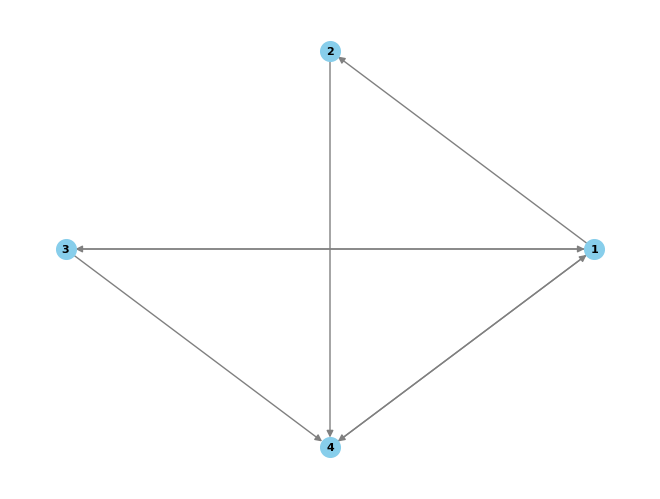

Test Case 2:
Output: 1


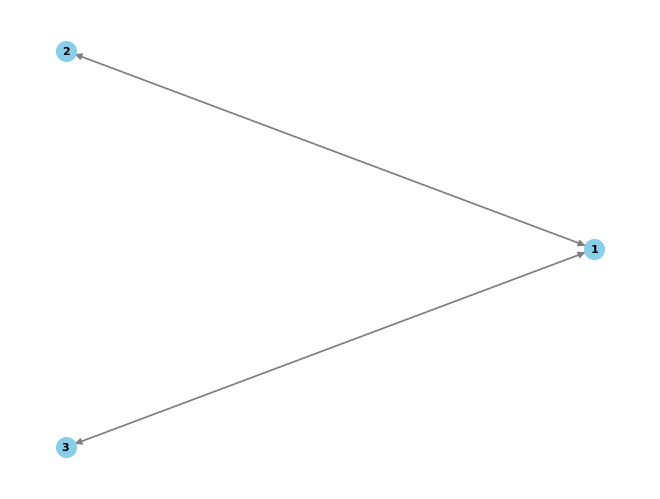

Test Case 3:
Output: 0


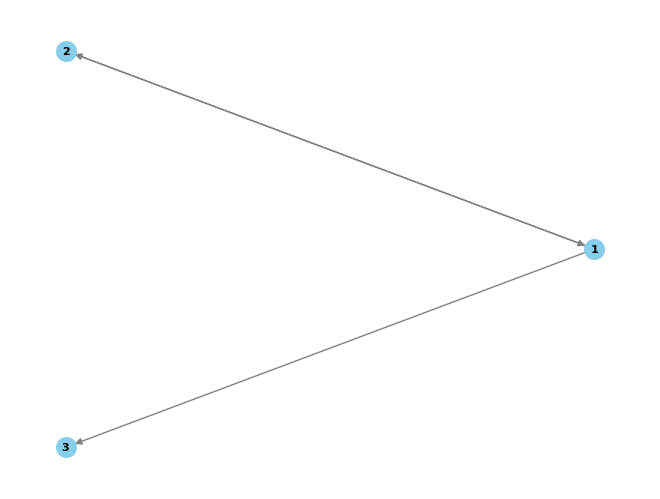

Test Case 4:
Output: 1


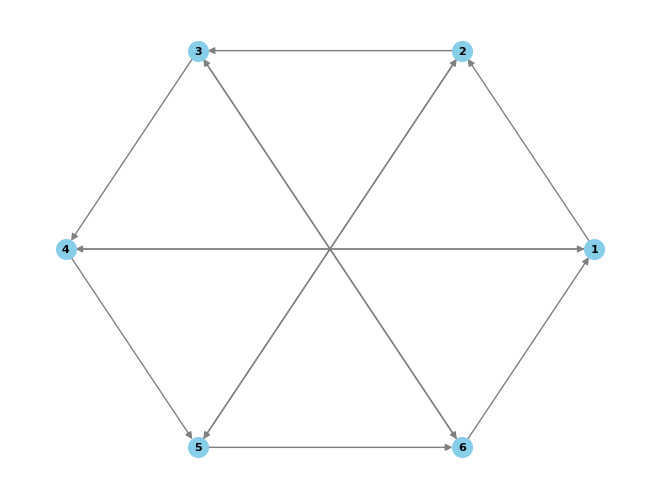

Test Case 5:
Output: 1


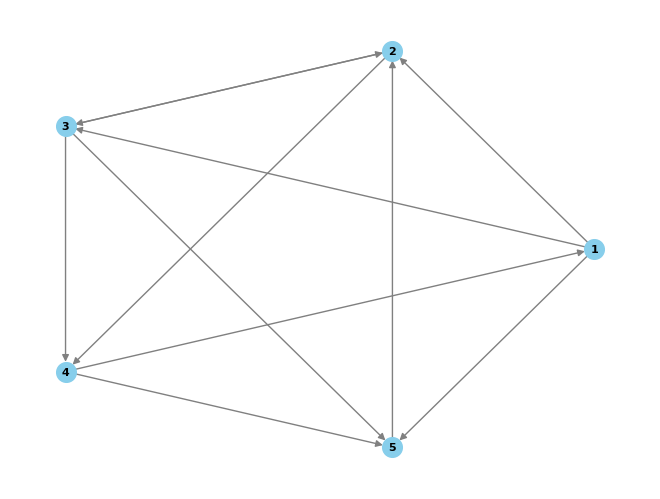

Test Case 6:
Output: 0


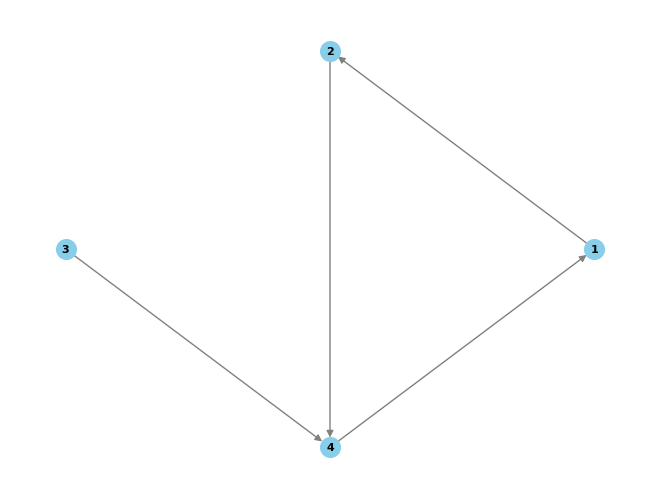

Test Case 7:
Output: 1


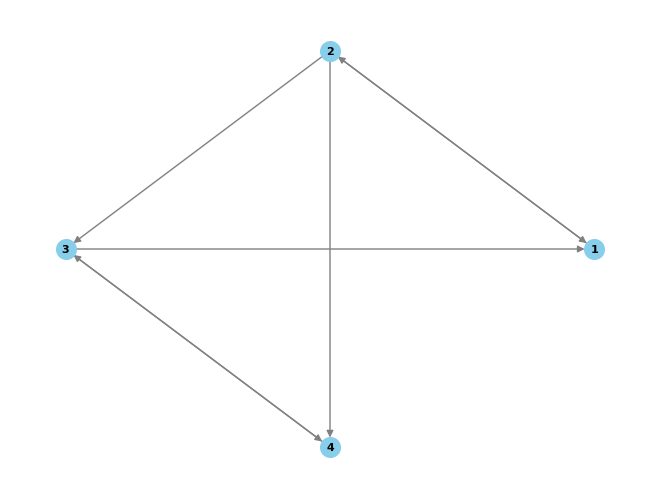

In [12]:
import matplotlib.pyplot as plt
import networkx as nx

# Function to draw a graph based on the given roads (edges) and number of cities (nodes)
def draw_graph(N, roads):
    G = nx.DiGraph()  # Create a directed graph
    for i in range(1, N + 1):
        G.add_node(i)  # Add nodes to the graph

    for a, b, c in roads:
        G.add_edge(a, b)  # Add a directed edge for one-way and two-way roads
        if c == 2:
            G.add_edge(b, a)  # Add the reverse edge for two-way roads

    pos = nx.circular_layout(G)  # Use a circular layout for better visibility
    nx.draw(G, pos, with_labels=True, font_weight='bold', node_color='skyblue', font_size=8, node_size=200, font_color='black', edge_color='gray')
    plt.show()

# Draw graphs for each test case
for i, test in enumerate(test_cases):
    print(f"Test Case {i + 1}:")
    print(f"Output: {output_two_pass_dfs[i]}")
    draw_graph(test['N'], test['roads'])